In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Perceptron Models
Form the basis of neural networks & evolved from linear regression
- Rely on same linear specification $y = \alpha + \beta X$ but is used for classification
- Turns function into a rule to classify into groups A and B:
$$\alpha + \beta X \geq 0 : A $$
$$ \alpha + \beta X < 0 : B$$
    - $\alpha =$ the shift, way of regularizing the boundary to zero
    - $\beta =$ the weight, controls the influence of variables linearly a la OLS
- Perceptron cost minimization
    - Sum of the output of functional form from all misclassified examples (aka minimizes classifier error)
    - If a boundary with errors is created, take absolute value of misclassified observations and sums to get cost
    - Boundaries that correctly divide all datapoints have zero cost
    - This simple perceptron outcome is binary
- Common practice: invoking a gradient curve, prediction will take non-binary values between 0 and 1
    - Logistic/sigmoid curve: gives a nice S shape
    $$ \frac{1}{1+e^{-x}} $$
    - Continuous outputs allows for more subtlety in perceptron model (and thus in NNs)

In [2]:
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

In [5]:
from sklearn.linear_model import Perceptron

X = test_data[['test', 'project']]
Y = test_data['pass']

#fit model
#10,000 iterations to help ensure accuracy as data is non-normalized
perceptron = Perceptron(max_iter=10000)
perceptron.fit(X,Y)

#get params
print('score: ' + str(perceptron.score(X,Y)))

score: 1.0


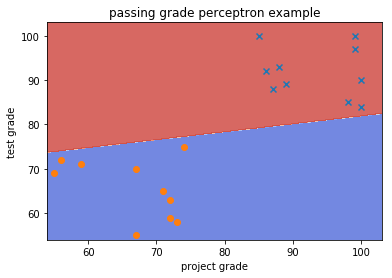

In [6]:
#establish mesh
x_min, x_max = X.test.min() - 1, X.test.max() + 3
y_min, y_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

#predict over mesh
Z = (perceptron.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

#reshape prediction to be plottable & plot
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

#aesthetics
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('project grade')
plt.ylabel('test grade')
plt.title('passing grade perceptron example')
plt.show()

__Result:__ simplicity of the perceptron cost function means it continues to try new things until it meets the condition that every point is classified correctly (cost is zero), at which point it stops
- Inefficient, many iterations
- Compare to decision tree: not great on their own but ensemble methods result in very powerful models
- At its core, a neural network is just an ensemble of perceptrons